<a href="https://colab.research.google.com/github/spshreya/DeepLearningBasics/blob/main/companydata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data= pd.read_csv(r"abc.csv")

In [ ]:
data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419 entries, 0 to 3418
Columns: 124 entries, Organization Name to Unnamed: 123
dtypes: float64(23), object(101)
memory usage: 3.2+ MB


In [ ]:
data['IPO Status'].value_counts()

Private     3067
Public       218
Delisted      29
Name: IPO Status, dtype: int64

In [ ]:
dataa=data.fillna(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataa["Funding Status"] = le.fit_transform(data["Funding Status"].astype(str))
dataa["Number of Founders"] = le.fit_transform(data["Number of Founders"].astype(str))
dataa["Number of Employees"] = le.fit_transform(data["Number of Employees"].astype(str))
dataa["Last Funding Type"] = le.fit_transform(data["Last Funding Type"].astype(str))
dataa["Last Equity Funding Type"] = le.fit_transform(data["Last Equity Funding Type"].astype(str))
dataa["Last Equity Funding Amount Currency"] = le.fit_transform(data["Last Equity Funding Amount Currency"].astype(str))
dataa["Last Equity Funding Amount Currency (in USD)"] = le.fit_transform(data["Last Equity Funding Amount Currency (in USD)"].astype(str))
dataa["Total Funding Amount Currency (in USD)"] = le.fit_transform(data["Total Funding Amount Currency (in USD)"].astype(str))
dataa["Number of Lead Investors"] = le.fit_transform(data["Number of Lead Investors"].astype(str))
dataa["Number of Investors"] = le.fit_transform(data["Number of Investors"].astype(str))
dataa["Number of Acquisitions"] = le.fit_transform(data["Number of Acquisitions"].astype(str))
dataa["IPO Status"] = le.fit_transform(data["IPO Status"].astype(str))

In [ ]:
dataa["Last Equity Funding Type"].head()

0    17
1     9
2    12
3    13
4     8
Name: Last Equity Funding Type, dtype: int64

In [ ]:
x = dataa[["Funding Status","Number of Founders","Number of Employees","Last Funding Type","Last Equity Funding Type","Last Equity Funding Amount Currency","Last Equity Funding Amount Currency (in USD)","Total Funding Amount Currency (in USD)","Number of Lead Investors","Number of Investors","Number of Acquisitions"]]

In [ ]:
x.head()

In [ ]:
y = dataa.loc[:, dataa.columns == 'IPO Status']
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))
y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [ ]:
len(y_train)

2735

In [ ]:
len(x_train)

2735

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation= tf.nn.softmax))

model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

history=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
86/86 [==============================] - 1s 4ms/step - loss: 0.7353 - accuracy: 0.8008 - val_loss: 0.2814 - val_accuracy: 0.9254
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9396 - val_loss: 0.2447 - val_accuracy: 0.9371
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9471 - val_loss: 0.2167 - val_accuracy: 0.9386
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9455 - val_loss: 0.2152 - val_accuracy: 0.9415
Epoch 5/50
86/86 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9539 - val_loss: 0.2031 - val_accuracy: 0.9430
Epoch 6/50
86/86 [==============================] - 0s 2ms/step - loss: 0.1630 - accuracy: 0.9530 - val_loss: 0.1881 - val_accuracy: 0.9488
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1621 - accuracy: 0.9547 - val_loss: 0.1869 - val_accuracy: 0.9474
Epoch 8/50
86/86 [==

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 11)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 260       
Total params: 14,212
Trainable params: 14,212
Non-trainable params: 0
_________________________________________________________________


In [ ]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

22/22 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9620
0.2129068225622177 0.9619883298873901


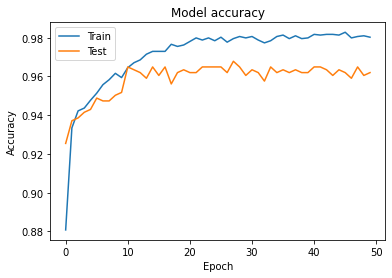

In [ ]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()